# Data from Franke's function

### In this file we will show how we run the code and how we get the results that we get. 

First off, we import all the functions from the file functions.py. It is there all the functions are. In addition, we will use seaborn for beautiful plots, and dataframes for easy visualization. 

In [31]:
from functions.functions import *
import seaborn as sns; sns.set()
from pandas import DataFrame

Then we will generate the x and y points, and z as Franke's function. 

x ranges from 0 to 1 with a total amount of 20 points.
y ranges from 0 to 1 with a total amount of 20 points.


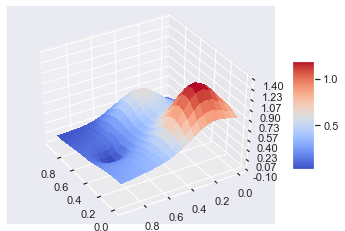

In [32]:
x,y,z = generate_data(20)

So we generate x and y as 1D array with one hundred points, but then we use np.meshgrid() on them, resulting in total amount of data points for x and y:

In [33]:
print ("Total amount of data points for x is: ", len(x))
print ("Total amount of data points for y is: ", len(y))

Total amount of data points for x is:  400
Total amount of data points for y is:  400


Defining variables next: 

In [34]:
degrees = np.linspace(1,10,10)

bias = np.zeros(len(degrees))
variance = np.zeros(len(degrees))

test_MSE_OLS = np.zeros(len(degrees))
train_MSE = np.zeros(len(degrees))


R2_OLS = np.zeros(len(degrees))
CI_OLS = np.zeros((len(degrees),3))
betas_OLS = {}

# Ordinary Least Square

Performing 5 fold cross-validation with our 'OLS'.

In [35]:
k = 5 #cross fold
for polygrad in degrees:

    j = int(polygrad) - 1
    scores, betas_OLS[int(polygrad)] = bias_variance(x,y,z,polygrad,k, regressiontype='OLS')

    train_MSE[j] = scores[0]
    R2_OLS[j] = scores[1]

    test_MSE_OLS[j] = scores[2]
    bias[j] = scores[3]
    variance[j] = scores[4]
    CI_OLS[j] = scores[5]
    
    if (test_MSE_OLS[j]>= (bias[j]+variance[j])):
        print ("Correct: ")
    else :
        print ("MSE is not equal to variance + bias^2 by : {}".format(test_MSE_OLS[j]-(bias[j]+variance[j])))
    print('{} >= {} + {} = {}'.format(test_MSE_OLS[j],bias[j], variance[j], bias[j]+variance[j]))
    print (" ")

Correct: 
0.03892130645031313 >= 0.038745517918786464 + 0.00017578853152666135 = 0.03892130645031312
 
Correct: 
0.03263071539924647 >= 0.0324913379900475 + 0.0001393774091989676 = 0.03263071539924647
 
Correct: 
0.017812308430795155 >= 0.017728035465444516 + 8.427296535064042e-05 = 0.017812308430795155
 
MSE is not equal to variance + bias^2 by : -3.469446951953614e-18
0.014889661365816098 >= 0.014476731205980137 + 0.0004129301598359642 = 0.014889661365816102
 
Correct: 
0.014105098648999906 >= 0.013792697542461962 + 0.0003124011065379419 = 0.014105098648999904
 
Correct: 
0.012109344083138168 >= 0.0116756008876416 + 0.00043374319549656685 = 0.012109344083138168
 
Correct: 
0.013086923544719156 >= 0.012623689503780466 + 0.00046323404093868634 = 0.013086923544719152
 
Correct: 
0.014525605714339154 >= 0.01307022124452834 + 0.0014553844698108136 = 0.014525605714339154
 
MSE is not equal to variance + bias^2 by : -1.734723475976807e-18
0.014456894539544485 >= 0.01272045828621102 + 0.0017

As we can see, if our test has not been successful, the error is negligible.

We can also calculate the confidence interval. 

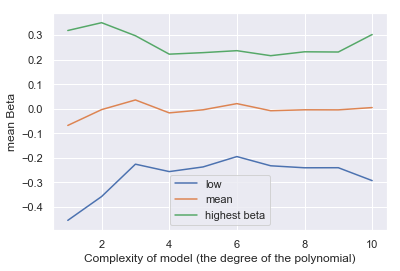

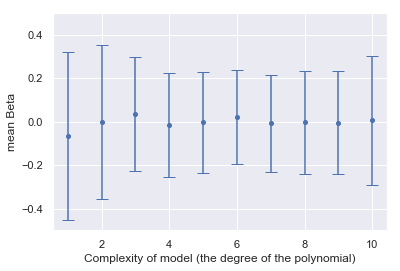

In [36]:
plt.plot(degrees,CI_OLS[:,0])
plt.plot(degrees,CI_OLS[:,1])
plt.plot(degrees,CI_OLS[:,2])
plt.legend(["low","mean", "highest beta"])
plt.ylabel("mean Beta")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.show()


fig, ax = plt.subplots()

ax.set_ylim(-0.5,0.5)
(_, caps, _) = plt.errorbar(degrees, CI_OLS[:,1], yerr=(CI_OLS[:,0]-CI_OLS[:,1]), fmt='o', markersize=4, capsize=6,label='jepp')

for cap in caps:
    cap.set_markeredgewidth(1)
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("mean Beta")
plt.show()


Here we would like to compare our test and train MSE, and also look at our variance and bias trade-off as a function. 

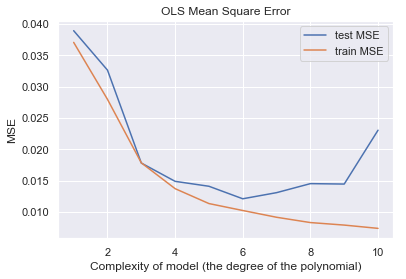

In [37]:
plt.plot(degrees,test_MSE_OLS)
plt.plot(degrees,train_MSE)
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("MSE")
plt.title("OLS Mean Square Error")
plt.legend(["test MSE","train MSE"])
plt.savefig('plots/Franke/OLS_test_train_MSE.pdf')
plt.show()

Here we can see that to avoid overfitting we should choose a polynomial degree of between 4 and 6.

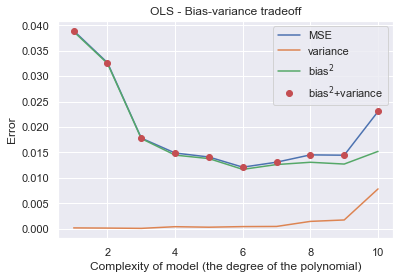

In [38]:
plt.plot(degrees,test_MSE_OLS)
plt.plot(degrees,variance)
plt.plot(degrees,bias)
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.title("OLS - Bias-variance tradeoff")
plt.ylabel("Error")
plt.plot(degrees,variance+bias,'o')
plt.legend(["MSE","variance", "bias$^2$","bias$^2$+variance"])
plt.savefig('plots/Franke/OLS_bias_variance.pdf')
plt.show()

In [39]:
data_OLS = DataFrame({"MSE": test_MSE_OLS, "Bias": bias, "Variance": variance, "R2-score": R2_OLS})
print (data_OLS)

        MSE      Bias  Variance  R2-score
0  0.038921  0.038746  0.000176  0.639178
1  0.032631  0.032491  0.000139  0.669138
2  0.017812  0.017728  0.000084  0.850391
3  0.014890  0.014477  0.000413  0.814587
4  0.014105  0.013793  0.000312  0.837333
5  0.012109  0.011676  0.000434  0.895275
6  0.013087  0.012624  0.000463  0.884535
7  0.014526  0.013070  0.001455  0.871774
8  0.014457  0.012720  0.001736  0.846633
9  0.023048  0.015211  0.007836  0.861520


In the following code, we have included an example from the bootstrap method with samples = 100. The purpose of it is to compare the curves of the mean square error. From experience, the curve has been seen to be a lot smoother and give a more pedagogical point of view of the bias-variance trade-off, but does not beat the mean square error of cross-validation. And since the trade off is a compromise of getting the best model, it felt unnatural to spend more time on bootstrap. But, yet again, we have included it for comparison.

100%|██████████| 10/10 [00:02<00:00,  4.03it/s]


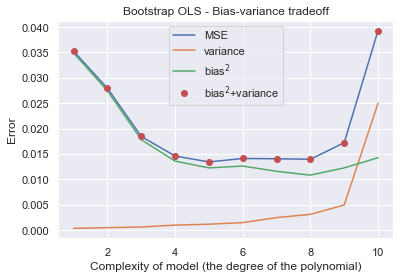

In [40]:
test_bootstrap = bootstrap(x,y,z,degrees)

error_bootstrap_OLS = test_bootstrap[0]
bias_bootstrap_OLS = test_bootstrap[1]
variance_bootstrap_OLS = test_bootstrap[2]

plt.plot(degrees,error_bootstrap_OLS)
plt.plot(degrees,variance_bootstrap_OLS)
plt.plot(degrees,bias_bootstrap_OLS)
plt.plot(degrees,variance_bootstrap_OLS+bias_bootstrap_OLS,'o')
plt.legend(["MSE","variance", "bias$^2$","bias$^2$+variance"])
plt.title("Bootstrap OLS - Bias-variance tradeoff")
plt.ylabel("Error")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.show()

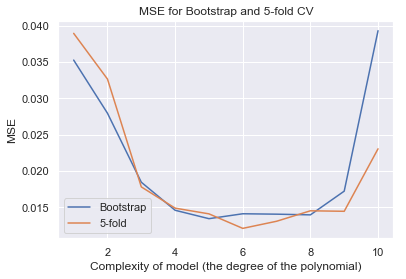

In [41]:
plt.plot(degrees,error_bootstrap_OLS)
plt.plot(degrees,test_MSE_OLS)
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("MSE")
plt.title("MSE for Bootstrap and 5-fold CV")
plt.legend(["Bootstrap","5-fold"])
plt.show()

# Ridge regression

We will do much of the same analysis as we did above, but first we need to check which hyperparameter lambda is best. 

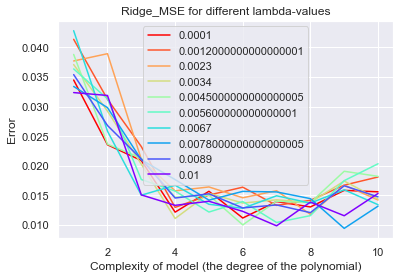

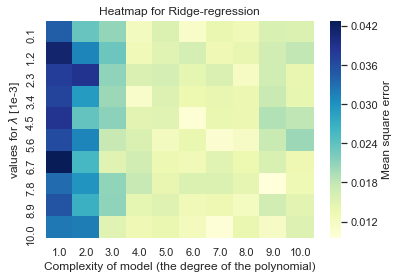

In [42]:
nlambdas = 10
#lambdas = np.logspace(-3,-2,nlambdas)
lambdas = np.linspace(1e-4,1e-2,nlambdas)
color=iter(cm.rainbow(np.linspace(1,0,nlambdas)))
heatmap_mse = np.zeros((nlambdas,len(degrees)))

i=0
for lamb in lambdas:  
        
        test2_MSE = Different_Lambdas(x, y, z, degrees, k, lamb, regressiontype='Ridge')       
        heatmap_mse[i] = test2_MSE
        i += 1
        c = next(color)
        plt.plot(degrees,test2_MSE, c=c)
        plt.legend(lambdas)
        plt.xlabel("Complexity of model (the degree of the polynomial)")
        plt.ylabel("Error")
        plt.title("Ridge_MSE for different lambda-values")
plt.show()

df = DataFrame(heatmap_mse, index = lambdas*1e3, columns = degrees)
fig = sns.heatmap(df, cmap="YlGnBu", yticklabels=df.index.values.round(5),fmt='2g',cbar_kws={'label': 'Mean square error'})
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("values for $\lambda$ [1e-3]")
plt.title("Heatmap for Ridge-regression")
plt.savefig('plots/Franke/Ridge_heatmap_lambdas.pdf')
plt.show()

As it is possible to see in the heatmap above, choosing the correct $\lambda$ is not as crucial as choosing the correct complexity of the model. But, as we still have to choose a value, we will choose a low $\lambda=1e-3$. 

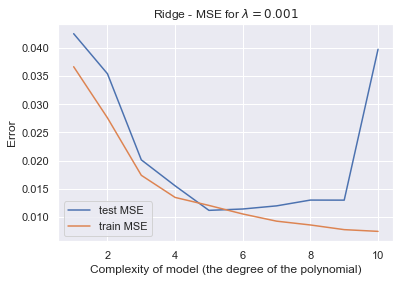

In [43]:
lamb_Ridge = 1e-3

test_MSE_Ridge, R2_Ridge, Bias, Variance, CI_Ridge, betas_Ridge,train_MSE_Ridge = Best_Lambda(x, y, z, degrees, k, lamb_Ridge, regressiontype='Ridge')

plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,train_MSE_Ridge)
plt.legend(["test MSE","train MSE"])
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
plt.title("Ridge - MSE for $\lambda=%g $"%(lamb_Ridge))
plt.savefig('plots/Franke/Ridge_train_test_MSE.pdf')
plt.show()

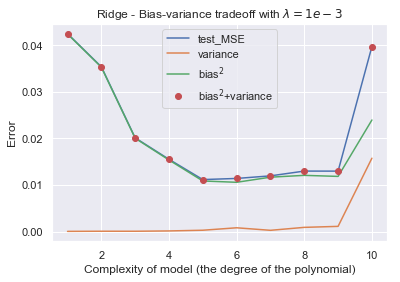

In [44]:
plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,Variance)
plt.plot(degrees,Bias)
plt.title("Ridge - Bias-variance tradeoff with $\lambda=1e-3$")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
plt.plot(degrees,Variance+Bias,'o')
plt.legend(["test_MSE","variance", "bias$^2$","bias$^2$+variance"])
plt.savefig("plots/Franke/Ridge_bias_variance.pdf")
plt.show()

In [45]:
data_Ridge = DataFrame({"polynomial degree": degrees,"MSE": test_MSE_Ridge, "Bias": Bias, "Variance": Variance, "R2-score": R2_Ridge})
print (data_Ridge)

   polynomial degree       MSE      Bias  Variance  R2-score
0                1.0  0.042500  0.042443  0.000057  0.654555
1                2.0  0.035392  0.035306  0.000086  0.574004
2                3.0  0.020134  0.020052  0.000082  0.781940
3                4.0  0.015529  0.015379  0.000150  0.843813
4                5.0  0.011179  0.010879  0.000301  0.891170
5                6.0  0.011420  0.010594  0.000826  0.900198
6                7.0  0.011975  0.011692  0.000283  0.862887
7                8.0  0.013002  0.012084  0.000918  0.889637
8                9.0  0.012991  0.011859  0.001131  0.870604
9               10.0  0.039736  0.023969  0.015767  0.756254


Unfortunately, the bias-variance plots with 5-fold cross validation does not turn out very nice. Thus, we also plot with the bootstrap resample method. 

100%|██████████| 10/10 [00:02<00:00,  3.67it/s]


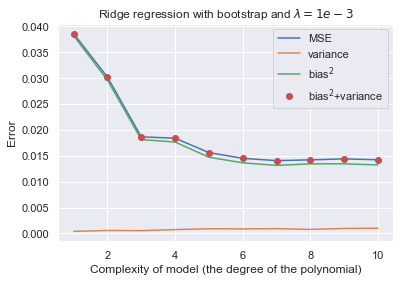

In [46]:
test_bootstrap_Rigde = bootstrap(x,y,z,degrees,lamb_Ridge, 'Ridge')

error_bootstrap_Ridge = test_bootstrap_Rigde[0]
bias_bootstrap_Ridge = test_bootstrap_Rigde[1]
variance_bootstrap_Ridge = test_bootstrap_Rigde[2]

plt.plot(degrees,error_bootstrap_Ridge)
plt.plot(degrees,variance_bootstrap_Ridge)
plt.plot(degrees,bias_bootstrap_Ridge)
plt.plot(degrees,variance_bootstrap_Ridge+bias_bootstrap_Ridge,'o')
plt.legend(["MSE","variance", "bias$^2$","bias$^2$+variance"])
plt.title("Ridge regression with bootstrap and $\lambda=1e-3$")
plt.ylabel("Error")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.show()

We can also calculate the confidence interval of the beta. 

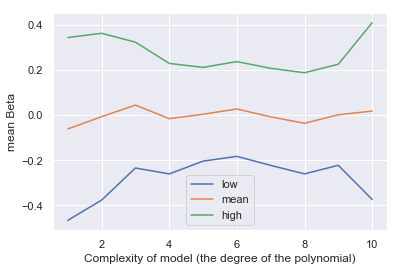

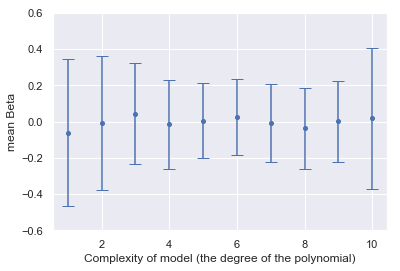

In [47]:
plt.plot(degrees,CI_Ridge[:,0])
plt.plot(degrees,CI_Ridge[:,1])
plt.plot(degrees,CI_Ridge[:,2])
plt.legend(["low","mean", "high"])
plt.ylabel("mean Beta")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.show()


fig, ax = plt.subplots()

ax.set_ylim(-0.6,0.6)
import seaborn as sns
(_, caps, _) = plt.errorbar(degrees, CI_Ridge[:,1], yerr=(CI_Ridge[:,0]-CI_Ridge[:,1]), fmt='o', markersize=4, capsize=6)

for cap in caps:
    cap.set_markeredgewidth(1)
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("mean Beta")
plt.show()

# LASSO regression

100%|██████████| 11/11 [00:01<00:00,  6.00it/s]


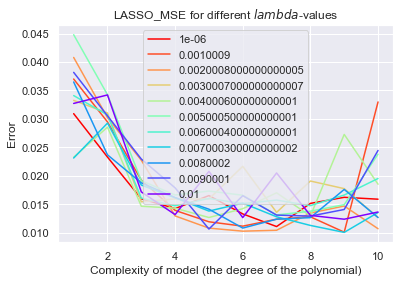

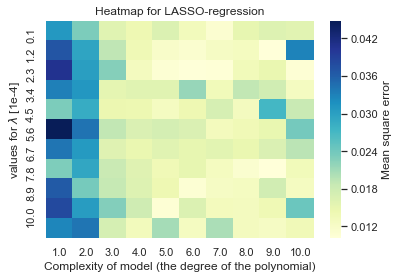

In [48]:
nlambdas = 11
lambdas = np.linspace(1e-6,1e-2,nlambdas)
color=iter(cm.rainbow(np.linspace(1,0,nlambdas)))
array_LASSO = np.zeros((nlambdas,len(degrees)))
i=0

for lamb in tqdm.tqdm(lambdas):  
        
        test_MSE_LASSO = Different_Lambdas(x, y, z, degrees, k, lamb, regressiontype='Lasso')       
        array_LASSO[i] = test_MSE_LASSO
        i += 1
        c = next(color)
        plt.plot(degrees,test_MSE_LASSO, c=c)
        plt.legend(lambdas)
        plt.xlabel("Complexity of model (the degree of the polynomial)")
        plt.ylabel("Error")
        plt.title("LASSO_MSE for different $lambda$-values")
plt.show()

import seaborn as sns; sns.set()
from pandas import DataFrame

df_LASSO = DataFrame(array_LASSO, index = lambdas*1e4, columns = degrees)
fig = sns.heatmap(df_LASSO, cmap="YlGnBu", yticklabels=df.index.values.round(5),fmt='.4g',cbar_kws={'label': 'Mean square error'})
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("values for $\lambda$ [1e-4]")
plt.title("Heatmap for LASSO-regression")
plt.savefig('plots/Franke/LASSO_heatmap_lambdas.pdf')
plt.show()

Similar to Ridge, choosing the correct $\lambda$ value for the LASSO-regression is not as crucial as choosing a high complexity of the model. 

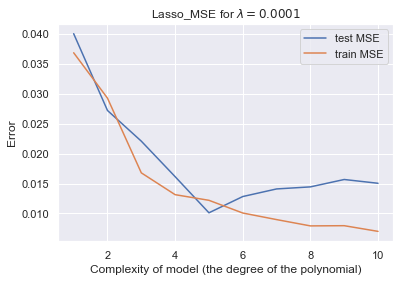

In [49]:
lamb_LASSO = 1e-4

test_MSE_LASSO,R2_LASSO, Bias, Variance, CI_LASSO, betas_LASSO, train_MSE_LASSO = Best_Lambda(x, y, z, degrees, k, lamb_LASSO, regressiontype='Lasso')

plt.plot(degrees,test_MSE_LASSO)
plt.plot(degrees,train_MSE_LASSO)
plt.legend(["test MSE","train MSE"])
plt.title("Lasso_MSE for $\lambda=%g$"%(lamb_LASSO))
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
plt.savefig('plots/Franke/LASSO_train_test_MSE.pdf')
plt.show()


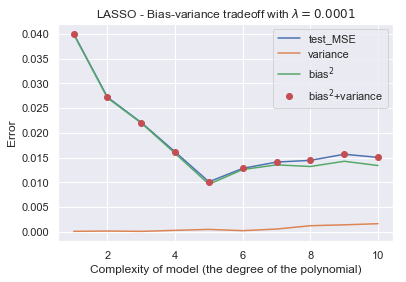

In [50]:
plt.plot(degrees,test_MSE_LASSO)
plt.plot(degrees,Variance)
plt.plot(degrees,Bias)
plt.title("LASSO - Bias-variance tradeoff with $\lambda=%0.4f$"%(lamb_LASSO))
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
plt.plot(degrees,Variance+Bias,'o')
plt.legend(["test_MSE","variance", "bias$^2$","bias$^2$+variance"])
plt.savefig("plots/Franke/LASSO_bias_variance.pdf")
plt.show()

In [51]:
data_LASSO = DataFrame({"degree": degrees, "MSE": test_MSE_LASSO, "Bias": Bias, "Variance": Variance, "R2-score": R2_LASSO})
print (data_LASSO)

   degree       MSE      Bias  Variance  R2-score
0     1.0  0.040020  0.039918  0.000102  0.637622
1     2.0  0.027195  0.027035  0.000160  0.690388
2     3.0  0.022071  0.021976  0.000095  0.805599
3     4.0  0.016144  0.015841  0.000303  0.829959
4     5.0  0.010109  0.009617  0.000491  0.894427
5     6.0  0.012823  0.012585  0.000238  0.879377
6     7.0  0.014093  0.013528  0.000565  0.828356
7     8.0  0.014437  0.013199  0.001238  0.851879
8     9.0  0.015670  0.014252  0.001418  0.853207
9    10.0  0.015039  0.013394  0.001645  0.850451


Let us also compare with the bootstrap method. 

100%|██████████| 10/10 [00:02<00:00,  4.54it/s]


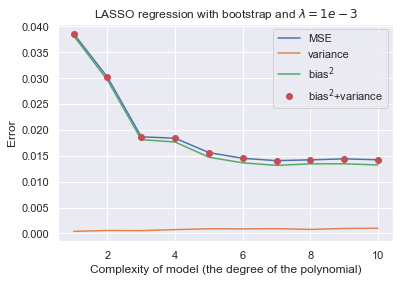

In [52]:
test_bootstrap_LASSO = bootstrap(x,y,z,degrees,lamb_Ridge, 'Ridge')

error_bootstrap_LASSO = test_bootstrap_Rigde[0]
bias_bootstrap_LASSO = test_bootstrap_Rigde[1]
variance_bootstrap_LASSO = test_bootstrap_Rigde[2]

plt.plot(degrees,error_bootstrap_LASSO)
plt.plot(degrees,variance_bootstrap_LASSO)
plt.plot(degrees,bias_bootstrap_LASSO)
plt.plot(degrees,variance_bootstrap_LASSO+bias_bootstrap_LASSO,'o')
plt.legend(["MSE","variance", "bias$^2$","bias$^2$+variance"])
plt.title("LASSO regression with bootstrap and $\lambda=1e-3$")
plt.ylabel("Error")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.show()

And we can also calculate the confidence interval for the Lasso regression.

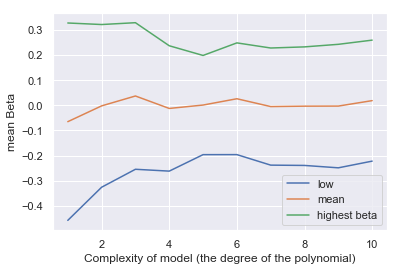

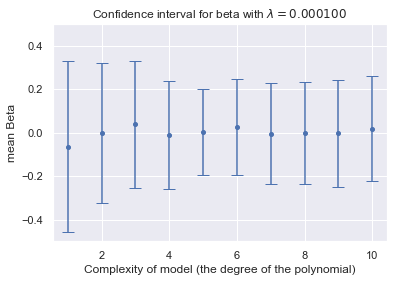

In [53]:
plt.plot(degrees,CI_LASSO[:,0])
plt.plot(degrees,CI_LASSO[:,1])
plt.plot(degrees,CI_LASSO[:,2])
plt.legend(["low","mean", "highest beta"])
plt.ylabel("mean Beta")
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.show()


fig, ax = plt.subplots()

ax.set_ylim(-0.5,0.5)
import seaborn as sns
(_, caps, _) = plt.errorbar(degrees, CI_LASSO[:,1], yerr=(CI_LASSO[:,0]-CI_LASSO[:,1]), fmt='o', markersize=4, capsize=6,label='jepp')

for cap in caps:
    cap.set_markeredgewidth(1)
plt.title("Confidence interval for beta with $\lambda=%f$"%(lamb_LASSO))
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("mean Beta")
plt.show()

# What is the best model?

Now we can try to find out which model is the best. A simple plot of the different regression models with the best $\lambda$ functions will do. 

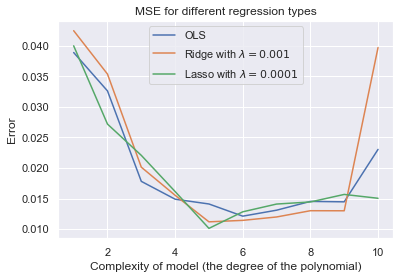

In [54]:
plt.plot(degrees,test_MSE_OLS)
plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,test_MSE_LASSO)
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
axes = plt.gca()

#axes.set_ylim([0,0.02])
plt.title("MSE for different regression types")
plt.legend(["OLS","Ridge with $\lambda=%.3f $"%(lamb_Ridge),"Lasso with $\lambda=%.4f$"%(lamb_LASSO)])
plt.savefig("plots/Franke/MSE_all_regressions.pdf")
plt.show()

# Confidence Intervals

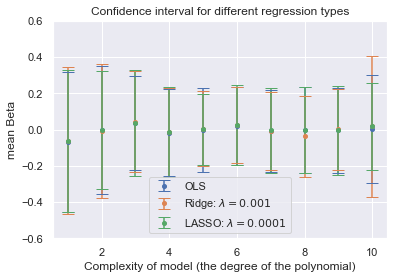

In [55]:
fig, ax = plt.subplots()

ax.set_ylim(-0.5,0.5)
import seaborn as sns
(_, caps, _) = plt.errorbar(degrees, CI_OLS[:,1], yerr=(CI_OLS[:,0]-CI_OLS[:,1]), fmt='o', markersize=4, capsize=6)
(_, caps, _) = plt.errorbar(degrees, CI_Ridge[:,1], yerr=(CI_Ridge[:,0]-CI_Ridge[:,1]), fmt='o', markersize=4, capsize=6)
(_, caps, _) = plt.errorbar(degrees, CI_LASSO[:,1], yerr=(CI_LASSO[:,0]-CI_LASSO[:,1]), fmt='o', markersize=4, capsize=6)

plt.legend(["OLS","Ridge: $\lambda=%0.3f$"%lamb_Ridge,"LASSO: $\lambda=%0.4f$"%lamb_LASSO])
for cap in caps:
    cap.set_markeredgewidth(1)
plt.title("Confidence interval for different regression types")
ax.set_ylim(-0.6,0.6)

plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("mean Beta")
plt.show()

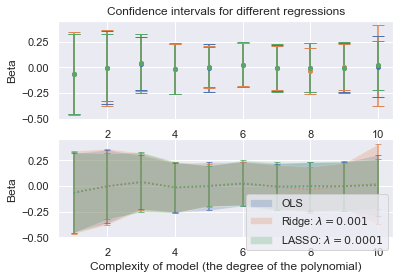

In [56]:
data_1 = {
    'x': list(degrees),
    'y': list( CI_OLS[:,1]),
    'yerr': (CI_OLS[:,0]-CI_OLS[:,1])}
data_2 = {
    'x': list(degrees),
    'y': list( CI_Ridge[:,1]),
    'yerr': (CI_Ridge[:,0]-CI_Ridge[:,1])}
data_3 = {
    'x': list(degrees),
    'y': list( CI_LASSO[:,1]),
    'yerr': (CI_LASSO[:,0]-CI_LASSO[:,1])}
# plot
plt.figure()
# only errorbar
plt.subplot(211)
for data in [data_1, data_2, data_3]:
    plt.errorbar(**data, fmt='o', markersize=4, capsize=6)
# errorbar + fill_between
plt.ylabel("Beta")
plt.title("Confidence intervals for different regressions")
plt.subplot(212)
for data in [data_1, data_2,data_3]:
    plt.errorbar(**data, alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    plt.fill_between(**data, alpha=.25)
plt.legend(["OLS","Ridge: $\lambda=%0.3f$"%lamb_Ridge,"LASSO: $\lambda=%0.4f$"%lamb_LASSO],bbox_to_anchor=(0.5, 0., 0.5, 0.5),loc='best')
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Beta")
plt.savefig("plots/Franke/beta_confidence.pdf")
plt.show()

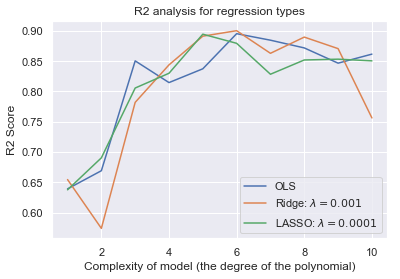

   Degrees       OLS     Ridge     LASSO
0      1.0  0.639178  0.654555  0.637622
1      2.0  0.669138  0.574004  0.690388
2      3.0  0.850391  0.781940  0.805599
3      4.0  0.814587  0.843813  0.829959
4      5.0  0.837333  0.891170  0.894427
5      6.0  0.895275  0.900198  0.879377
6      7.0  0.884535  0.862887  0.828356
7      8.0  0.871774  0.889637  0.851879
8      9.0  0.846633  0.870604  0.853207
9     10.0  0.861520  0.756254  0.850451


In [57]:
plt.plot(degrees,R2_OLS)
plt.plot(degrees,R2_Ridge)
plt.plot(degrees,R2_LASSO)
plt.legend(["OLS","Ridge: $\lambda=%0.3f$"%lamb_Ridge,"LASSO: $\lambda=%0.4f$"%lamb_LASSO])
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("R2 Score")
plt.title("R2 analysis for regression types")
plt.savefig("plots/Franke/R2_scores.pdf")
plt.show()

R2 = {"Degrees":degrees,"OLS":R2_OLS, "Ridge": R2_Ridge, "LASSO":R2_LASSO}
R2 = DataFrame(R2)
print(R2)

## What does this actually mean? 

We can use our model to try and visualize the different polynomials, and see if our model can actually model Franke's function. 

x ranges from 0 to 1 with a total amount of 20 points.
y ranges from 0 to 1 with a total amount of 20 points.


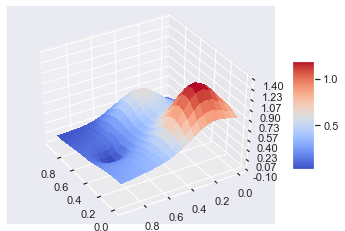

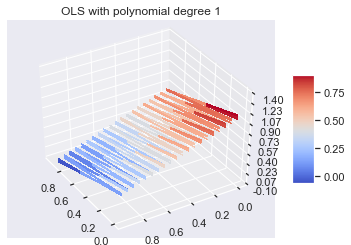

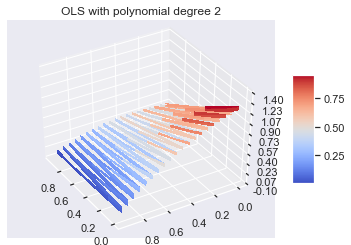

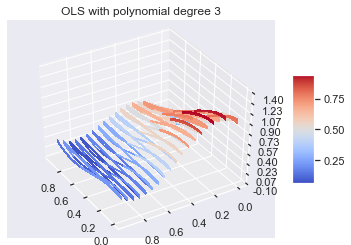

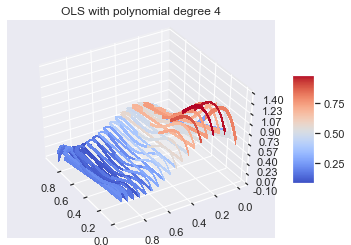

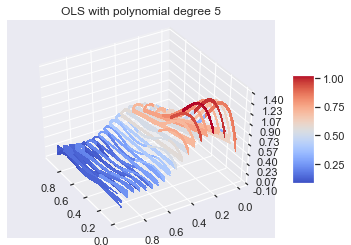

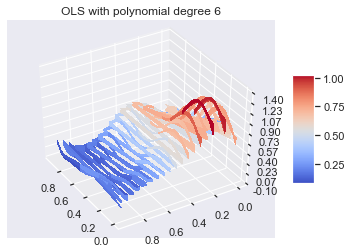

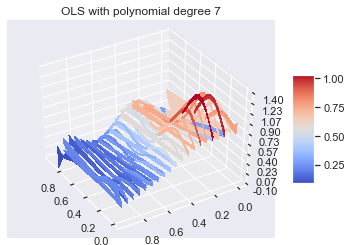

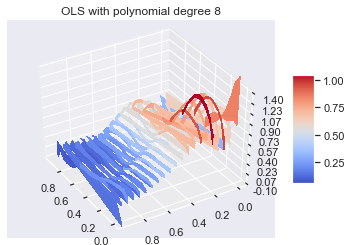

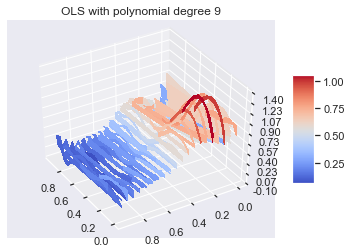

In [59]:
x,y,z = generate_data(20)

x = np.reshape(x,(len(x),1))
y = np.reshape(y,(len(y),1))

for i in range(1,10):
    X = find_designmatrix(x,y,i)
    beta = betas_OLS[i]
    z_OLS = X @ beta
    plotter(x,y,z_OLS)
    plt.savefig('plots/frankefunction_polynomial' + '%i'%(i)+'.pdf')
    plt.title('OLS with polynomial degree %i' % i)

As seen, this model shows that there are indications that we can fit it, but not as an exact fit. 